## Exercise 1

In [1]:
import numpy as np

house_income = np.loadtxt(
    "https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/us_household_incomes.txt"
)
# print(house_income)

## Exercise 2
* It does not look like a normal or uniform distribution.  
* This makes us think that in common equality is relatively low in the United States because the distribution is skewed.

(array([8.77542e+05, 4.35030e+04, 1.01710e+04, 1.92100e+03, 3.98000e+02,
        1.17000e+02, 2.90000e+01, 8.00000e+00, 4.00000e+00, 2.00000e+00]),
 array([ -16942. ,  225842.5,  468627. ,  711411.5,  954196. , 1196980.5,
        1439765. , 1682549.5, 1925334. , 2168118.5, 2410903. ]),
 <BarContainer object of 10 artists>)

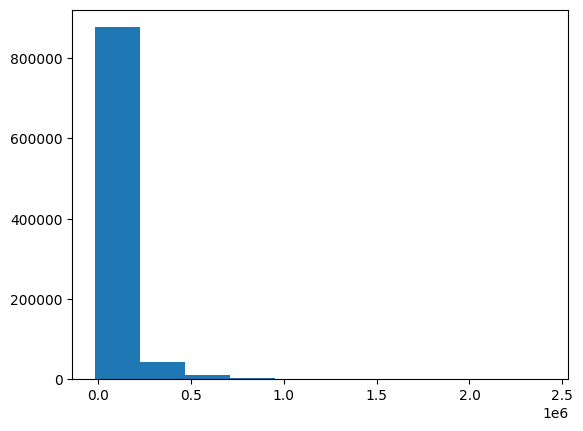

In [2]:
from matplotlib import pyplot as plt

plt.hist(house_income)

## Exercise 3
* It does not look like a uniform distribution, but it improves, compared to the first one.  
* The income distribution is significant right-skewd. So the skewness in the US income distribution is driven by extreme high earners.

(array([262190., 338722., 173615.,  76580.,  33854.,  16134.,   8329.,
          5401.,   4556.,   4038.]),
 array([-16942.,  34752.,  86446., 138140., 189834., 241528., 293222.,
        344916., 396610., 448304., 499998.]),
 <BarContainer object of 10 artists>)

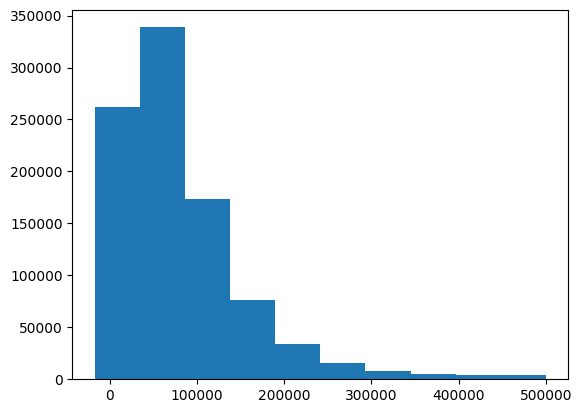

In [3]:
house_income_low = house_income[house_income < 500_000]
plt.hist(house_income_low)

## Exercise 4

In [4]:
from ineqpy.inequality import gini

In [5]:
results = {}
results["ex4_share_below_poverty"] = len(house_income[house_income < 20_000]) / len(
    house_income
)
results["ex4_gini"] = gini(house_income)
results

{'ex4_share_below_poverty': 0.14711442173300704,
 'ex4_gini': 0.48109255468791856}

## Exercise 5
* The U.S. is relatively ecnomically equal comapred to countries like South Africa and Zambia. But there are more countries with lower gini index.
* It is not I expects as I thought the U.S. have lower gini index.

## Exercise 6

In [6]:
policy_A = house_income.copy()
policy_B = house_income.copy()
policy_A[policy_A < 40_000] = policy_A[policy_A < 40_000] + 5000
policy_B[policy_B < 30_000] = policy_B[policy_B < 30_000] + 7000
results["ex6_gini_policy_a"] = gini(policy_A)
results["ex6_gini_policy_b"] = gini(policy_B)
results["ex6_gini_which_reduced_more"] = "Policy B"
results

{'ex4_share_below_poverty': 0.14711442173300704,
 'ex4_gini': 0.48109255468791856,
 'ex6_gini_policy_a': 0.4602468507489471,
 'ex6_gini_policy_b': 0.4582821778789714,
 'ex6_gini_which_reduced_more': 'Policy B'}

## Exercise 7

In [7]:
policy_C = house_income.copy()
policy_C[policy_C > 250_000] = policy_C[policy_C > 250_000] * 0.95
results["ex7_gini_policy_c"] = gini(policy_C)
results

{'ex4_share_below_poverty': 0.14711442173300704,
 'ex4_gini': 0.48109255468791856,
 'ex6_gini_policy_a': 0.4602468507489471,
 'ex6_gini_policy_b': 0.4582821778789714,
 'ex6_gini_which_reduced_more': 'Policy B',
 'ex7_gini_policy_c': 0.4756173843900695}

## Exercise 8

In [8]:
results["ex8_revenue_raised"] = np.sum(house_income[house_income > 250_000] * 0.05)
results

{'ex4_share_below_poverty': 0.14711442173300704,
 'ex4_gini': 0.48109255468791856,
 'ex6_gini_policy_a': 0.4602468507489471,
 'ex6_gini_policy_b': 0.4582821778789714,
 'ex6_gini_which_reduced_more': 'Policy B',
 'ex7_gini_policy_c': 0.4756173843900695,
 'ex8_revenue_raised': 929623340.85}

## Exercise 9

In [9]:
np.count_nonzero(house_income < 30_000)

220906

In [10]:
np.sum(house_income < 30_000)

220906

In [11]:
np.mean(house_income < 30_000)

0.23659332008846573

In [12]:
results["ex9_transfers"] = results["ex8_revenue_raised"] / (
    np.count_nonzero(house_income[house_income < 30_000])
)
# MAY NEED MODIFY

## Exercise 10

In [13]:
policy_D = house_income.copy()
policy_D[policy_D > 250_000] = policy_D[policy_D > 250_000] * 0.95
policy_D[policy_D < 30_000] = policy_D[policy_D < 30_000] + results["ex9_transfers"]
results["ex7_gini_policy_d"] = gini(policy_D)
results

{'ex4_share_below_poverty': 0.14711442173300704,
 'ex4_gini': 0.48109255468791856,
 'ex6_gini_policy_a': 0.4602468507489471,
 'ex6_gini_policy_b': 0.4582821778789714,
 'ex6_gini_which_reduced_more': 'Policy B',
 'ex7_gini_policy_c': 0.4756173843900695,
 'ex8_revenue_raised': 929623340.85,
 'ex9_transfers': 4467.474377784292,
 'ex7_gini_policy_d': 0.4608230281954682}

## Exercise 11

In [14]:
policy_E = house_income.copy()
policy_E[policy_E > 250_000] = policy_E[policy_E > 250_000] * 0.95
policy_E[policy_E < 40_000] = policy_E[policy_E < 40_000] + results["ex9_transfers"]
results["ex7_gini_policy_e"] = gini(policy_E)
results

{'ex4_share_below_poverty': 0.14711442173300704,
 'ex4_gini': 0.48109255468791856,
 'ex6_gini_policy_a': 0.4602468507489471,
 'ex6_gini_policy_b': 0.4582821778789714,
 'ex6_gini_which_reduced_more': 'Policy B',
 'ex7_gini_policy_c': 0.4756173843900695,
 'ex8_revenue_raised': 929623340.85,
 'ex9_transfers': 4467.474377784292,
 'ex7_gini_policy_d': 0.4608230281954682,
 'ex7_gini_policy_e': 0.4568298367972015}

## Exercise 12

In [15]:
results["ex12_policy_recommendation"] = "Policy E"
results

{'ex4_share_below_poverty': 0.14711442173300704,
 'ex4_gini': 0.48109255468791856,
 'ex6_gini_policy_a': 0.4602468507489471,
 'ex6_gini_policy_b': 0.4582821778789714,
 'ex6_gini_which_reduced_more': 'Policy B',
 'ex7_gini_policy_c': 0.4756173843900695,
 'ex8_revenue_raised': 929623340.85,
 'ex9_transfers': 4467.474377784292,
 'ex7_gini_policy_d': 0.4608230281954682,
 'ex7_gini_policy_e': 0.4568298367972015,
 'ex12_policy_recommendation': 'Policy E'}

In [16]:
assert set(results.keys()) == {
    "ex4_share_below_poverty",
    "ex4_gini",
    "ex6_gini_policy_a",
    "ex6_gini_policy_b",
    "ex6_gini_which_reduced_more",
    "ex7_gini_policy_c",
    "ex8_revenue_raised",
    "ex9_transfers",
    "ex10_gini_policy_d",
    "ex11_gini_policy_e",
    "ex12_policy_recommendation",
}

AssertionError: 

Cite: Steven Ruggles, Sarah Flood, Sophia Foster, Ronald Goeken, Jose Pacas, Megan Schouweiler and Matthew Sobek. IPUMS USA: Version 11.0 [dataset]. Minneapolis, MN: IPUMS, 2021. https://doi.org/10.18128/D010.V11.0